In [14]:
#Set up workspace
%reset -f 
import os
import numpy as np
#import scipy
import scipy.interpolate
import scipy.signal
import scipy.optimize
import matplotlib.pyplot as plt
#os.getcwd()
os.chdir('C:\\Users\\tobia\\Desktop\\Research\\Berkeley\\Brohawn\\EPhys');
#os.getcwd()

Text(0.5, 0, 'Time (s)')

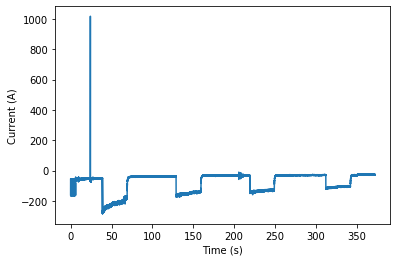

In [2]:
#Open file and inspect
file_name="2021_10_26_0011.atf"
sweeps=np.loadtxt(file_name,delimiter="\t",skiprows=10)

plt.plot(sweeps[:,0],sweeps[:,1])
plt.ylabel("Current (A)")
plt.xlabel("Time (s)")

Text(0.5, 0, 'Time (s)')

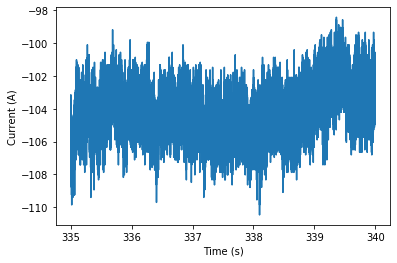

In [3]:
#Define parameters for 'on' condition.
frame_rate=0.00005; #in seconds
sweep_num=1; #for multi-sweep (multi-column) files

time_on_start=335;
time_off_start=300;

time_on=sweeps[int(time_on_start/frame_rate):int((time_on_start+5)/frame_rate),0];
p_curr=sweeps[int(time_on_start/frame_rate):int((time_on_start+5)/frame_rate),sweep_num];
#print(p_curr)
plt.plot(time_on,p_curr)
plt.ylabel("Current (pA)")
plt.xlabel("Time (s)")

Text(0.5, 0, 'Time (s)')

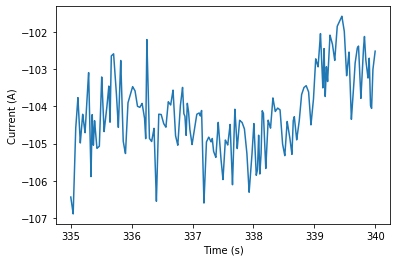

In [5]:
#Make model of noise for Baseline correcting 'On' Condition
model_y_on=scipy.interpolate.UnivariateSpline(time_on,p_curr,k=1);
plt.plot(time_on,model_y_on(time_on))
plt.ylabel("Current (pA)")
plt.xlabel("Time (s)")

Text(0.5, 0, 'Time (s)')

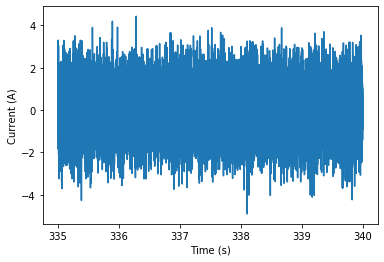

In [6]:
#Get Baseline-Corrected 'On' Condition
subtracted_on=p_curr-model_y_on(time_on);
plt.plot(time_on,subtracted_on)
plt.ylabel("Current (pA)")
plt.xlabel("Time (s)")

Text(0.5, 0, 'Frequency (Hz)')

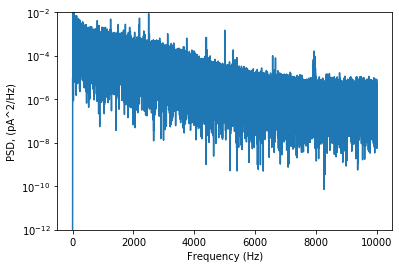

In [7]:
#Get PSD for 'On Condition'
f_on,spec_on=scipy.signal.periodogram(subtracted_on,fs=1/frame_rate);
#print(spec_on)
plt.semilogy(f_on,spec_on)
plt.ylim([1e-12, 1e-2])
plt.ylabel("PSD, (pA^2/Hz)")
plt.xlabel("Frequency (Hz)")

Text(0.5, 0, 'Time (s)')

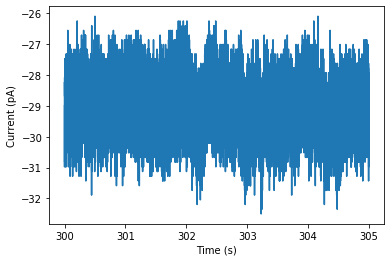

In [8]:
#Get trace for off condition
time_off=sweeps[int(time_off_start/frame_rate):int((time_off_start+5)/frame_rate),0];
p_curr_off=sweeps[int(time_off_start/frame_rate):int((time_off_start+5)/frame_rate),sweep_num];
#print(p_curr)
plt.plot(time_off,p_curr_off)
plt.ylabel("Current (pA)")
plt.xlabel("Time (s)")

Text(0.5, 0, 'Time (s)')

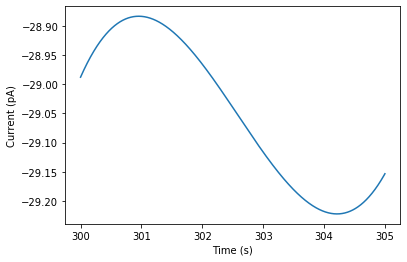

In [9]:
#Make model of noise for Baseline correcting 'On' Condition
model_y_off=scipy.interpolate.UnivariateSpline(time_off,p_curr_off);
plt.plot(time_off,model_y_off(time_off))
plt.ylabel("Current (pA)")
plt.xlabel("Time (s)")

Text(0.5, 0, 'Time (s)')

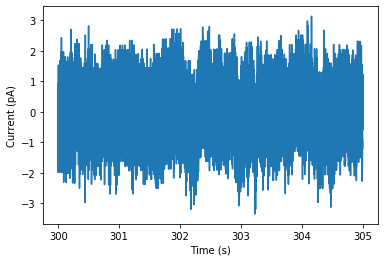

In [10]:
#Get Baseline-Corrected 'Off' Conditions
subtracted_off=p_curr_off-model_y_off(time_off);
plt.plot(time_off,subtracted_off)
plt.ylabel("Current (pA)")
plt.xlabel("Time (s)")

Text(0.5, 0, 'Frequency (Hz)')

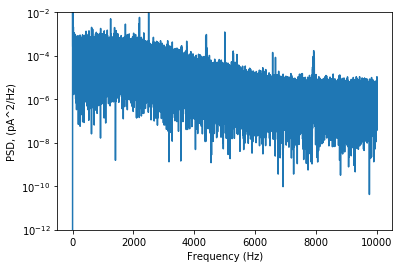

In [11]:
#Get PSD for 'Off Condition'
f_off,spec_off=scipy.signal.periodogram(subtracted_off,fs=1/frame_rate);
#print(spec_on)
plt.semilogy(f_off,spec_off)
plt.ylim([1e-12, 1e-2])
plt.ylabel("PSD, (pA^2/Hz)")
plt.xlabel("Frequency (Hz)")

Text(0.5, 0, 'Frequency (Hz)')

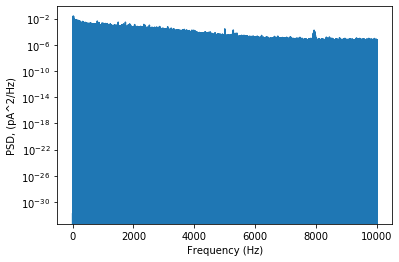

In [12]:
#Subtract PSDs
delta_spec=spec_on-spec_off;
plt.semilogy(f_off,delta_spec)
#plt.ylim([1e-12, 1e-2])
plt.ylabel("PSD, (pA^2/Hz)")
plt.xlabel("Frequency (Hz)")

In [47]:
#Fit a Lorentzian to your Delta_PSD
delta_dat=np.vstack([f_off,delta_spec]);
def min_loren( dat, a, gam ):
    return np.sum((a/(1+(dat[0,:]/gam)**2) - dat[1,:])**2)
#print(delta_dat[0,:])
fit=scipy.optimize.minimize(min_loren,delta_dat,args=(1,1))
#min_loren( delta_dat, 0.01, 0.01 )

IndexError: too many indices for array